# Explicació de la base de dades a analitzar

En aquesta base de dades, es recull informació de més de 20.000 partides d'escacs online, jugades en la pàgina de Lichess.org. Els camps dels que es recull informació de les partides són els següents:
    ·Game ID;
    ·Rated (T/F);
    ·Start Time;
    ·End Time;
    ·Number of Turns;
    ·Game Status;
    ·Winner;
    ·Time Increment;
    ·White Player ID;
    ·White Player Rating;
    ·Black Player ID;
    ·Black Player Rating;
    ·All Moves in Standard Chess Notation;
    ·Opening Eco (Standardised Code for any given opening, list here);
    ·Opening Name;
    ·Opening Ply (Number of moves in the opening phase)

La base de dades en sí no té un objectiu concret, però se'n poden derivar alguns de diferents a partir de les dades. Exemples d'objectius a predir serien què permet a un jugador guanyar jugant com a blanc o negre, com afecten els factors externs al joc, la relació entre començar jugant (fent el primer moviment) i guanyar com a blanc o com a negre...



# Llibreries utilitzades

Les llibreries que es necessitaran per a fer el projecte son les següents:
    ·Numpy -> Servirà per operar amb matrius de forma eficient.
    ·Pandas -> Servirà per a organitzar i manipular la informació, guardada en forma de taula.
    ·MatPlot -> Servirà per a fer gràfiques a partir de les matrius.
    ·Spicy -> Servirà per a fer operacions matemàtiques.
    ·Seaborn -> Utilizta MatPlot i permet fer gràfiques més complexes.
    ·Sklearn -> Permetrà utilitzar diferents models d'aprenentatge computacional.
    ·Math -> Permetrà fer operacions matemàtiques amb nombres reals.

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


import math



# Optimització i manipulació de les dades

En aquest apartat es manipularan les dades per a poder operar amb elles de millor forma. D'aquesta manera, s'eliminaran columnes duplicades, files duplicades, valors Nan...

In [2]:
from IPython.display import HTML
dataset = pd.read_csv("BBDD/games.csv")
dataset.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4




Un cop observades les 10 primeres entrades de la BBDD, observerem si existeixen files duplicades:

In [3]:
dataset[dataset.duplicated(keep=False)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
120,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
1443,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1794,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1795,wgIHzqDo,True,1.499710e+12,1.499710e+12,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,e4 e6 e5 Bc5 d4 Be7 c3 Nh6 Bxh6 gxh6 Qd2 Bg5 f...,C00,French Defense: Steinitz Attack,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,Uk0pZCRR,True,1.499532e+12,1.499541e+12,95,resign,black,45+45,kferapont,2094,moistvonlipwig,2228,e4 e5 Nf3 Nc6 Bb5 g6 d4 exd4 Bxc6 dxc6 Qxd4 Qx...,C60,Ruy Lopez: Fianchetto Defense,6
20014,ZhZm1ol9,True,1.498871e+12,1.498879e+12,109,draw,draw,45+45,moistvonlipwig,2229,mn8,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,Italian Game: Classical Variation | Greco Gam...,17
20015,fpqjttDx,True,1.497663e+12,1.497664e+12,42,resign,black,7+30,waltersafarian,2162,moistvonlipwig,2214,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 a5 e3 O-O Bd3 b6 O-O...,E11,Bogo-Indian Defense: Wade-Smyslov Variation,8
20016,lzPgCJCS,True,1.497660e+12,1.497663e+12,102,resign,black,7+30,moistvonlipwig,2236,waltersafarian,2148,e4 g6 Nc3 Bg7 f4 c6 g3 d6 Bg2 e5 fxe5 dxe5 d3 ...,B06,Modern Defense,2




El resultat ha estat que han estat trobades 816 files duplicades, per tant, s'eliminaran del dataset:

In [3]:
dataset = dataset.drop_duplicates()
dataset[dataset.duplicated(keep=False)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply




Un cop eliminades les files duplicades s'ha d'examinar si existeixen valors NaN:

In [4]:
dataset.isnull().values.any()

False

Com podem observar, no existeixen valors NaN i per tant, no farà falta eliminar-los del dataset.



# Matriu de correlació

Un cop preparat el dataset de dades, cal una última preparació, la variable winner. Aquesta variable es del tipus string però necessitem codificar-la per a realitzar les prediccions. Per a fer-ho més simple de predir, ens centrarem en el que ens interesa, predir victòria o derrota, per tant, la convertirem en una variable binaria. Podem observar la matriu de correlació a veure quina informació ens pot aportar:

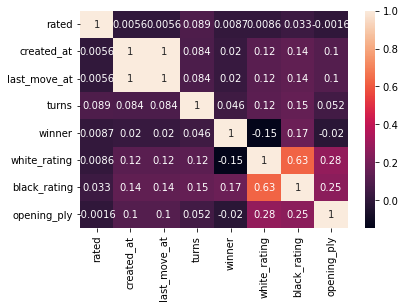

In [5]:
#modifiquem l'atribut winner -> white = 0, black = 1, draw = 2
dataset['winner'] = dataset['winner'].replace(['white', 'black', 'draw'], [0, 1, 2])
dataset = dataset[dataset['winner'] != 2]
dataset.head(10)

#fem la matriu de correlació
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


Es pot observar que els resultats de la matriu de correlació no ens aporten una informació clara. Centrant-nos en l'atribut objectiu a predir, el "winner", podem observar que cap dels atributs numèrics aporta una correlació alta. Cal destacar que s'ha codificat aquest atribut ja que era del tipus string i no permetia fer una correlació. Centrant-nos en la matriu en general, observem que només hi ha dos atributs per sobre del 0.6 en correlació entre ells, que son el white_rating amb el black_Rating. Aquest fet és evident ja que la pàgina online assigna partides segons el rating dels jugadors, per tant, aquest serà semblant.
Per a fer la recta de regressió s'han escollit els valors numèrics (turns, winner, white_rating, black_rating i opening_ply).



# Descripció del dataset triat

In [6]:
dataset = dataset[["turns","white_rating","black_rating","opening_ply","winner"]]
dataset.describe()

,turns,white_rating,black_rating,opening_ply,winner
count,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000
mean,59.173695,1593.432900,1585.801507,4.791513,0.476671
std,32.223163,289.026685,289.421714,2.779821,0.499469
min,1.000000,784.000000,789.000000,1.000000,0.000000
25%,37.000000,1398.000000,1390.000000,3.000000,0.000000
50%,54.000000,1564.000000,1559.000000,4.000000,0.000000
75%,77.000000,1787.000000,1778.000000,6.000000,1.000000
max,349.000000,2700.000000,2723.000000,28.000000,1.000000



Podem observar que el min i max dels diferents atributs son diferents entre ells, estant així en escales molt diverses. Aquest fet, ens anticipa que les dades s'hauran d'escalar per a poder fer una predicció millor. Abans d'escalar, observem les distribucions d'aquest dataset triat amb l'atribut winner, que és l'atribut objectiu:

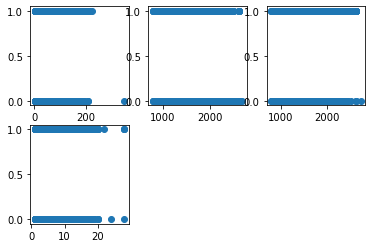

In [7]:
dataset = dataset.values
for i in range(1,5):
    ax = plt.subplot(2,3,i)
    ax.scatter(dataset[:,i-1], dataset[:,-1])


Podem observar que aquestes grràfiques no aporten gaire informació ja que no estan ben distribuïdes.



# Escalament de les dades i preparació dels conjunts d'entrenament

Com s'ha observat anteriorment, les escales de les dades son diferents, podent portar així a resultats inconcluents. Per aquest motiu, s'ha decidit escalar les dades:

In [8]:
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)

x = dataset[:,:4]
y = dataset[:,-1]

Ara preparem els conjunts d'entrenament pels models. S'ha triat fer un 70% de dades d'entrenament i 30% per a fer el testing dels models:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



# Models d'aprenentatge

S'han triat 5 models d'aprenentatge per a fer el testing del conjunt.

# Regressió lineal multivariable

Score: 0.1388873424599668
MSE: 0.21464691301702246


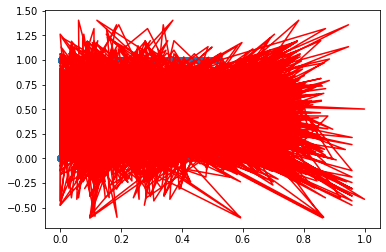

In [10]:
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

prediccions = linear_reg.predict(x_test)
print("Score: " + str(linear_reg.score(x_test, y_test)))
print("MSE: " + str(mean_squared_error(y_test, prediccions)))

plt.figure()
ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions, 'r')

Sembla evident que el resultat no és gaire bo ja que la variable a predir no genera una relació contínua amb les altres i per tant, aquest model no era el més adequat.



# Regressió d'arbre de decisió

Profunditat del arbre: 42
Numero de fulles del arbre: 3603
Score: -0.5278144688011741
MSE: 0.3808336302101888


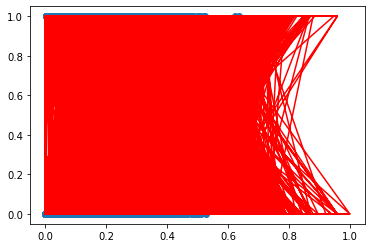

In [11]:
decision_tree = DecisionTreeRegressor()

decision_tree.fit(x_train, y_train)

print("Profunditat del arbre: " + str(decision_tree.get_depth()))
print("Numero de fulles del arbre: " + str(decision_tree.get_n_leaves()))

prediccions_arbre = decision_tree.predict(x_test)
print("Score: " + str(decision_tree.score(x_test, y_test)))
print("MSE: " + str(mean_squared_error(y_test, prediccions_arbre)))

ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_arbre, 'r')

Podem observar que l'arbre, a diferència de la regressió lineal multivariable, intenta abarcar tots els casos, generant així un error mitjà més elevat, i generant un Score negatiu.



# Regressió d'arbre aleatori

Score: 0.15885652762264446
MSE: 0.20966925543284645


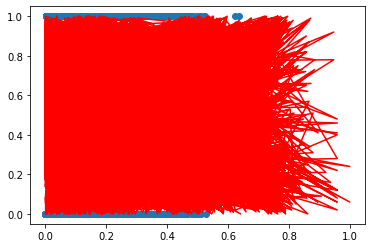

In [12]:
random_tree = RandomForestRegressor()

random_tree.fit(x_train, y_train)

prediccions_randtree = random_tree.predict(x_test)
print("Score: " + str(random_tree.score(x_test, y_test)))
print("MSE: " + str(mean_squared_error(y_test, prediccions_randtree) ))

ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_randtree, 'r')

Podem observar que abarca menys part de la gràfica que l'anterior model però genera un coeficient de determinació més elevat i un error mitjà més baix.



# Regressió Logística

Score: 0.6501603135019594
MSE: 0.3498396864980406


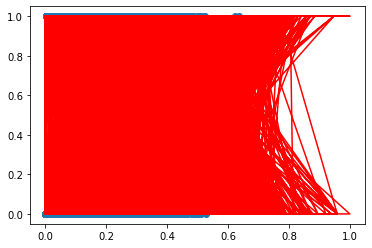

In [13]:
random_tree = LogisticRegression()

random_tree.fit(x_train, y_train)

prediccions_randtree = random_tree.predict(x_test)
print("Score: " + str(random_tree.score(x_test, y_test)))
print("MSE: " + str(mean_squared_error(y_test, prediccions_randtree) ))

ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_randtree, 'r')

Com es podia preveure, la regressió logística dona un millor score al ser una variable binaria.


# SGD - Descens de Gradient Estocàstic

Score: 0.6318133238332739
MSE: 0.36818667616672607


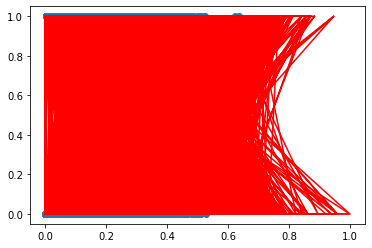

In [14]:
from sklearn.linear_model import SGDClassifier
random_tree = SGDClassifier()

random_tree.fit(x_train, y_train)

prediccions_randtree = random_tree.predict(x_test)
print("Score: " + str(random_tree.score(x_test, y_test)))
print("MSE: " + str(mean_squared_error(y_test, prediccions_randtree) ))

ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_randtree, 'r')

Podem observar que el score també és bastant elevat comparat amb els 3 primers, però lleugerament pitjor que el score de la regressió Logística.


# Cerca dels millors hiperparàmetres

En l'apartat anterior s'han utilitzat els models amb els paràmetres per defecte. Ara, es farà una cerca dels millors paràmetres per veure quin és el model que té més marge de millora i si pot superar a la regressió logística per defecte.

# Regressió Lineal Multivariable

In [15]:
# Importar las librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, mean_squared_error

# Crear el modelo de regresión lineal
model = LinearRegression()

# Crear el diccionario de hiperparámetros a probar
param_grid = {
    'fit_intercept': [True, False], # Probar si el modelo debe incluir un término intercepto
    'copy_X': [True, False], # Probar si el modelo debe copiar los datos de entrada
}

# Crear la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search.fit(x_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print('Mejores hiperparámetros:', grid_search.best_params_)


# Calcular el f1-score y el MSE medio para los mejores hiperparámetros
print("La millor score: " + str(grid_search.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test,grid_search.predict(x_test)))))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True}
La millor score: 0.13335522356905735
Error quadratic mitja: 0.46330002484029986


# Regressió d'arbre de decisió

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define los parámetros que quieres explorar
param_grid = {'max_depth': [1,3,5,10,15,25,30,50],
              'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3,0.4,0.5],
              'max_features': ['auto','log2','sqrt',None],
              'max_leaf_nodes': [None,10,20,50,80,100,250,500]}

# Crea una instancia del modelo DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Utiliza la búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(regressor, param_grid, cv=5, verbose=2, n_jobs=-1)

# Entrena el modelo utilizando los hiperparámetros encontrados
grid_search.fit(x_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son: {}".format(grid_search.best_params_))

# Calcular el f1-score y el MSE medio para los mejores hiperparámetros
print("La millor score: " + str(grid_search.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test,grid_search.predict(x_test)))))

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Los mejores hiperparámetros son: {'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': 50, 'min_weight_fraction_leaf': 0.0}
La millor score: 0.12622873412331664
Error quadratic mitja: 0.4716845716426038


# Regressió d'arbre aleatoria

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define los parámetros que quieres explorar
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Crea una instancia del modelo RandomForestRegressor
regressor = RandomForestRegressor()

# Utiliza la búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros
grid_search = RandomizedSearchCV(regressor, param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Entrena el modelo utilizando los hiperparámetros encontrados
grid_search.fit(x_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son: {}".format(grid_search.best_params_))

# Calcular el f1-score y el MSE medio para los mejores hiperparámetros
print("La millor score: " + str(grid_search.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test,grid_search.predict(x_test)))))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Los mejores hiperparámetros son: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
La millor score: 0.17263699973440602
Error quadratic mitja: 0.4462795094521141


# Regressió Logística

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define los parámetros que quieres explorar
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['l2'],
              'C': [100, 10, 1.0, 0.1, 0.01]}

# Crea una instancia del modelo LogisticRegression
regressor = LogisticRegression()

# Utiliza la búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(regressor, param_grid, cv=5, verbose=2, n_jobs=-1)

# Entrena el modelo utilizando los hiperparámetros encontrados
grid_search.fit(x_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son: {}".format(grid_search.best_params_))

# Calcular el f1-score y el MSE medio para los mejores hiperparámetros
print("La millor score: " + str(grid_search.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test,grid_search.predict(x_test)))))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Los mejores hiperparámetros son: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
La millor score: 0.6563331380487278
Error quadratic mitja: 0.5913218754491942


# SGD - Descens de Gradient Estocàstic

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

# Define los parámetros que quieres explorar
param_grid = {'loss': ['squared_error', 'huber'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# Crea una instancia del modelo SGDRegressor
regressor = SGDRegressor()

# Utiliza la búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Entrena el modelo utilizando los hiperparámetros encontrados
grid_search.fit(x_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Los mejores hiperparámetros son: {}".format(grid_search.best_params_))

# Calcular el f1-score y el MSE medio para los mejores hiperparámetros
print("La millor score: " + str(grid_search.best_score_))
print("Error quadratic mitja: " + str(math.sqrt(mean_squared_error(y_test,grid_search.predict(x_test)))))

Los mejores hiperparámetros son: {'alpha': 0.0001, 'l1_ratio': 0.0, 'loss': 'squared_error', 'penalty': 'l1'}
La millor score: -0.46694453213335685
Error quadratic mitja: 0.47123399255814247
